## Final Project Submission

Please fill out:
* __Student name__: Hannah Kwirikia
* __Student pace__: full time
* __Scheduled project review date/time__: 20th Nov.2022/ 11:59PM
* __Instructor name__: Mark Tiba 
* __Blog post URL__:


# Microsoft's Movie Market Analysis - What type of films should they create?

## Research Objectives

To find out what types of films are currently doing the best at the box office.

In [35]:
pwd

'C:\\Users\\Win 10 Pro\\Desktop\\dsc-phase-1-project-v2-4\\zippedData'

In [36]:
cd C:\\Users\\Win 10 Pro\\Desktop\\dsc-phase-1-project-v2-4\\zippedData

C:\Users\Win 10 Pro\Desktop\dsc-phase-1-project-v2-4\zippedData


## Import Libraries

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
%matplotlib inline

### Import first data

In [38]:
#to unzip IMDB file
import zipfile
with zipfile.ZipFile('im.db.zip', 'r') as my_zip:
    my_zip.extractall('files') # the unzipped files are now in a folder named files

The tables for the 'movie_basics' and 'movie_ratings' are the most important. We will look at them below.

In [39]:
pwd

'C:\\Users\\Win 10 Pro\\Desktop\\dsc-phase-1-project-v2-4\\zippedData'

In [40]:
cd C:\\Users\\Win 10 Pro\\Desktop\\dsc-phase-1-project-v2-4\\zippedData\\files

C:\Users\Win 10 Pro\Desktop\dsc-phase-1-project-v2-4\zippedData\files


In [41]:
#to view list of tables
conn = sqlite3.connect('im.db')
cur = conn.cursor()
cur.execute("""SELECT name FROM sqlite_master WHERE type = 'table';""")
table_names = cur.fetchall()
table_names

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

tables for the 'mTheovie_basics' and 'movie_ratings' are the most important. We will look at them below.

In [42]:
#to view the movie_basics table
movie_basics = pd.read_sql("""SELECT * FROM movie_basics;""", conn )
movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


In [43]:
#to view the movie_ratings table
movie_ratings = pd.read_sql("""SELECT * FROM movie_ratings;""", conn )
movie_ratings

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [44]:
#merge movie_basics and movie_ratings tables
merged_movies = pd.merge(left=movie_basics, right=movie_ratings, on='movie_id')
merged_movies.head(10)

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
5,tt0112502,Bigfoot,Bigfoot,2017,NaN,"Horror,Thriller",4.1,32
6,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263
7,tt0146592,Pál Adrienn,Pál Adrienn,2010,136.0,Drama,6.8,451
8,tt0154039,So Much for Justice!,Oda az igazság,2010,100.0,History,4.6,64
9,tt0159369,Cooper and Hemingway: The True Gen,Cooper and Hemingway: The True Gen,2013,180.0,Documentary,7.6,53


### Import Second Data

In [46]:
pwd

'C:\\Users\\Win 10 Pro\\Desktop\\dsc-phase-1-project-v2-4\\zippedData\\files'

In [47]:
cd C:\\Users\\Win 10 Pro\\Desktop\\dsc-phase-1-project-v2-4\\zippedData

C:\Users\Win 10 Pro\Desktop\dsc-phase-1-project-v2-4\zippedData


In [48]:
#unzip .gz file
import gzip
with gzip.open('bom.movie_gross.csv.gz') as f:

    bom_df = pd.read_csv(f)

In [49]:
#preview the data 
bom_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [50]:
#rename title column to primary_title to enable merging
bom_df.rename(columns = {'title':'primary_title'}, inplace = True)
bom_df.head()

,primary_title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [51]:
#merge first data with second data
df = pd.merge(left = merged_movies, right = bom_df, on = 'primary_title')
df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Relbig.,1100000.0,NaN,2016
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000,2012
2,tt4339118,On the Road,On the Road,2014,89.0,Drama,6.0,6,IFC,744000.0,8000000,2012
3,tt5647250,On the Road,On the Road,2016,121.0,Drama,5.7,127,IFC,744000.0,8000000,2012
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000,2013
...,...,...,...,...,...,...,...,...,...,...,...,...
3022,tt8331988,The Chambermaid,La camarista,2018,102.0,Drama,7.1,147,FM,300.0,NaN,2015
3023,tt8404272,How Long Will I Love U,Chao shi kong tong ju,2018,101.0,Romance,6.5,607,WGUSA,747000.0,82100000,2018
3024,tt8427036,Helicopter Eela,Helicopter Eela,2018,135.0,Drama,5.4,673,Eros,72000.0,NaN,2018
3025,tt9078374,Last Letter,"Ni hao, Zhihua",2018,114.0,"Drama,Romance",6.4,322,CL,181000.0,NaN,2018


In [52]:
#learn more about the data
df.shape

(3027, 12)

In [53]:
#summary of the data overview
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3027 entries, 0 to 3026
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         3027 non-null   object 
 1   primary_title    3027 non-null   object 
 2   original_title   3027 non-null   object 
 3   start_year       3027 non-null   int64  
 4   runtime_minutes  2980 non-null   float64
 5   genres           3020 non-null   object 
 6   averagerating    3027 non-null   float64
 7   numvotes         3027 non-null   int64  
 8   studio           3024 non-null   object 
 9   domestic_gross   3005 non-null   float64
 10  foreign_gross    1832 non-null   object 
 11  year             3027 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 307.4+ KB


In [54]:
#summary stats
df.describe()

,start_year,runtime_minutes,averagerating,numvotes,domestic_gross,year
count,3027.000000,2980.000000,3027.000000,3.027000e+03,3.005000e+03,3027.000000
mean,2013.783284,107.217114,6.457582,6.170030e+04,3.064033e+07,2014.077635
std,2.466955,20.073886,1.012277,1.255132e+05,6.671629e+07,2.442245
min,2010.000000,3.000000,1.600000,5.000000e+00,1.000000e+02,2010.000000
25%,2012.000000,94.000000,5.900000,2.117000e+03,1.390000e+05,2012.000000
50%,2014.000000,105.000000,6.600000,1.310900e+04,2.000000e+06,2014.000000
75%,2016.000000,118.000000,7.100000,6.276550e+04,3.250000e+07,2016.000000
max,2019.000000,272.000000,9.200000,1.841066e+06,7.001000e+08,2018.000000


### Look for any duplicates

In [57]:
# Duplicated entries
def identify_duplicates(data):
    """A function to identify any duplicates"""
    # identify the duplicates 
    # empty list to store Bool results from duplicated
    duplicates = []
    for i in data.duplicated():
        duplicates.append(i)
    # identify if there is any duplicates. 
    duplicates_set = set(duplicates) 
    if (len(duplicates_set) == 1):
        print("The Data has no duplicates")
    else:
        no_true = 0
        for val in duplicates:
            if (val == True):
                no_true += 1
        # percentage of the data represented by duplicates 
        duplicates_percentage = np.round(((no_true / len(data)) * 100), 3)
        print(f"The Data has {no_true} duplicated rows.\nThis constitutes {duplicates_percentage}% of the data set.") 



identify_duplicates(df)

The Data has no duplicates


Columns that have unique details such as the primary title should not contain any duplicates

In [58]:
def unique_column_duplicates(data, column):
    """handling duplicates in unique column"""
    # empty list to store the duplicate bools
    duplicates = []
    for i in data[column].duplicated():
        duplicates.append(i)
    
    # identify if there are any duplicates
    duplicates_set = set(duplicates)
    if (len(duplicates_set) == 1):
        print(f"The column {column.title()} has no duplicates")
    else:
        no_true = 0
        for val in duplicates:
            if (val == True):
                no_true += 1
        # percentage of the data represented by duplicates 
        duplicates_percentage = np.round(((no_true / len(data)) * 100), 3)
        print(f"The column {column.title()} has {no_true} duplicated rows.\nThis constitutes {duplicates_percentage}% of the data set.")


unique_column_duplicates(df, "primary_title")

The column Primary_Title has 429 duplicated rows.
This constitutes 14.172% of the data set.


Movie titles are unique. Thus we need to remove any duplicates

In [59]:
# handling the unique column duplicates 
def remove_unique_column_duplicates(data, column):
    """Simple Function to remove duplicated rows"""
    data.drop_duplicates(subset=column, keep="first", inplace=True)
    # confirm if the duplicated rows have been removed
    confirm = unique_column_duplicates(df, "primary_title")

    return confirm 


remove_unique_column_duplicates(df, "primary_title")

The column Primary_Title has no duplicates


### Percentage of missing values per column

In [61]:
# identify missing 
def identify_missing_values(data):
    """Identify is the data has missing values"""
    # identify if data has missing values(data.isnull().any())
    # empty dict to store missing values
    missing = []
    for i in data.isnull().any():
        # add the bool values to empty list 
        missing.append(i)
    # covert list to set (if data has missing value, the list should have true and false)
    missing_set = set(missing)
    if (len(missing_set) == 1):
        out = print("The Data has no missing values")
    else:
        out = print("The Data has missing values.")

    return out


identify_missing_values(df)

The Data has missing values.


In [62]:
#identify missing values
def missing_values(data):
    """A simple function to identify data has missing values"""
    # identify the total missing values per column
    # sort in order 
    miss = data.isnull().sum().sort_values(ascending = False)

    # calculate percentage of the missing values
    percentage_miss = (data.isnull().sum() / len(data)).sort_values(ascending = False)

    # store in a dataframe 
    missing = pd.DataFrame({"Missing Values": miss, "Percentage(%)": percentage_miss})

    # remove values that are missing 
    missing.drop(missing[missing["Percentage(%)"] == 0].index, inplace = True)

    return missing


missing_data = missing_values(df)
missing_data

,Missing Values,Percentage(%)
foreign_gross,1040,0.400308
domestic_gross,17,0.006543
runtime_minutes,14,0.005389
studio,3,0.001155
genres,1,0.000385


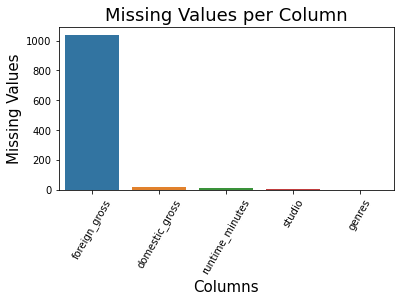

In [63]:
def graph_missing(data):
    """Graphically represent the missing values"""
    fig, axes = plt.subplots(figsize = (6, 3))

    sns.barplot(x = data.index , y = data["Missing Values"]) 
    plt.xlabel("Columns", fontdict={"color": "black",  "size": 15}) 
    plt.xticks(rotation = '60') 
    plt.ylabel("Missing Values", fontdict={"color": "black",  "size": 15}) 
    plt.title("Missing Values per Column", fontsize = 18)
    plt.show()

    # save the plot 
    fig.savefig("missing.png")


graph_missing(missing_data)

Since there are only 3 rows missing in the studio, we can drop those.

In [64]:
df = df.dropna(subset=['studio'])

Since there are only 1 row missing in the genre, we can drop that.

In [65]:
df = df.dropna(subset=['genres'])

The domestic_gross column has less than 1% (17 values) missing values. Thus, we will replace the missing value by the mean domestic_gross income.

In [67]:
#replace missing values in domestic_gross with mean
df['domestic_gross'] = df['domestic_gross'].fillna(df['domestic_gross'].mean())

The runtime_minutes column also has less than 1%(14 values) of missing values. Thus, we will replace the missing value by the mean runtime_minutes.

In [70]:
#replace missing values in runtime_minutes with mean
df['runtime_minutes'] = df['runtime_minutes'].fillna(df['runtime_minutes'].mean())

The foreign_gross column  has the highest number of missing values at about 40%. Thus, we drop that column.

In [71]:
#see the summary
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2594 entries, 0 to 3026
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         2594 non-null   object 
 1   primary_title    2594 non-null   object 
 2   original_title   2594 non-null   object 
 3   start_year       2594 non-null   int64  
 4   runtime_minutes  2594 non-null   float64
 5   genres           2594 non-null   object 
 6   averagerating    2594 non-null   float64
 7   numvotes         2594 non-null   int64  
 8   studio           2594 non-null   object 
 9   domestic_gross   2594 non-null   float64
 10  foreign_gross    1555 non-null   object 
 11  year             2594 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 263.5+ KB


### Check for Outliers

##### 1. domestic_gross

In [74]:
def IQR_outliers(data, column):
    """Simple function to identify and remove outliers using IQR"""
    # get Q1 and Q2
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    # calculate IQR
    IQR = Q3-Q1
    # identify ouliers (returns True if an outlier)
    out = ((data[column]<(Q1-1.5*IQR)) | (data[column]>(Q3+1.5*IQR)))

    # identify the outlier using index
    outliers_list = list(out[out==True].index)
    # identify the actual outliers using index
    outliers = []
    for val in outliers_list:
        outliers.append(data[column][val])

    
    return outliers, Q1, Q3, IQR


domestic_gross_outliers = IQR_outliers(df, "domestic_gross")
domestic_gross_outliers[0]

[652300000.0,
 110800000.0,
 200800000.0,
 100200000.0,
 85500000.0,
 415000000.0,
 182200000.0,
 149300000.0,
 412600000.0,
 125000000.0,
 101500000.0,
 176700000.0,
 142600000.0,
 90800000.0,
 81600000.0,
 180200000.0,
 187200000.0,
 291000000.0,
 80100000.0,
 181000000.0,
 103800000.0,
 188000000.0,
 202400000.0,
 110500000.0,
 148300000.0,
 92200000.0,
 107500000.0,
 111500000.0,
 80600000.0,
 217600000.0,
 238700000.0,
 303000000.0,
 126600000.0,
 131800000.0,
 118300000.0,
 107000000.0,
 262000000.0,
 105300000.0,
 93600000.0,
 148400000.0,
 229000000.0,
 104400000.0,
 80000000.0,
 98800000.0,
 116900000.0,
 148400000.0,
 136000000.0,
 82600000.0,
 94800000.0,
 132100000.0,
 80100000.0,
 304400000.0,
 125100000.0,
 101200000.0,
 128000000.0,
 116600000.0,
 176600000.0,
 258399999.0,
 123500000.0,
 113200000.0,
 88600000.0,
 89300000.0,
 232600000.0,
 191500000.0,
 237300000.0,
 80400000.0,
 312400000.0,
 209400000.0,
 125200000.0,
 100500000.0,
 138400000.0,
 83500000.0,
 9530000

The domestic_gross_outliers are possible values thus we will leave them as they are. 

<AxesSubplot:xlabel='domestic_gross'>

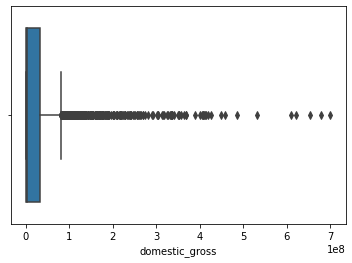

In [75]:
## use a box plot to identify outliers

sns.boxplot(data=df, x="domestic_gross")

##### 2. start year

The start year has no outliers as shown below

In [76]:
start_year_outliers = IQR_outliers(df, "start_year")
start_year_outliers[0]

[]

<AxesSubplot:xlabel='start_year'>

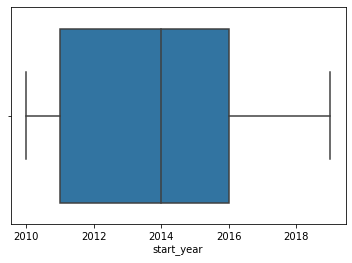

In [77]:
# use a box plot to identify outliers

sns.boxplot(data=df, x="start_year")

##### 3. Runtime minutes

In [78]:
runtime_minutes_outliers = IQR_outliers(df, "runtime_minutes")
runtime_minutes_outliers[0]

[169.0,
 169.0,
 180.0,
 165.0,
 161.0,
 272.0,
 163.0,
 164.0,
 172.0,
 157.0,
 181.0,
 157.0,
 41.0,
 158.0,
 161.0,
 156.0,
 163.0,
 157.0,
 50.0,
 49.0,
 157.0,
 172.0,
 174.0,
 165.0,
 164.0,
 165.0,
 165.0,
 176.0,
 160.0,
 45.0,
 180.0,
 160.0,
 186.0,
 44.0,
 159.0,
 40.0,
 47.0,
 46.0,
 57.0,
 40.0,
 160.0,
 157.0,
 168.0,
 45.0,
 168.0,
 177.0,
 163.0,
 158.0,
 163.0,
 162.0,
 170.0,
 184.0,
 158.0,
 158.0,
 167.0,
 161.0,
 189.0,
 156.0,
 164.0,
 161.0,
 156.0,
 161.0]

The runtime_minutes_outliers are possible values thus we will leave them as they are.

<AxesSubplot:xlabel='runtime_minutes'>

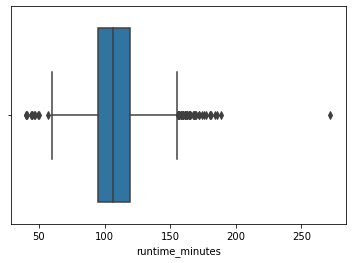

In [80]:
# use a box plot to identify outliers

sns.boxplot(data=df, x="runtime_minutes")

##### 5. averagerating

In [81]:
averagerating_outliers = IQR_outliers(df, "averagerating")
averagerating_outliers[0]

[3.8,
 4.0,
 3.5,
 3.3,
 4.1,
 4.3,
 4.2,
 4.3,
 4.3,
 4.3,
 8.8,
 4.2,
 4.2,
 4.1,
 9.2,
 3.5,
 4.3,
 4.3,
 4.2,
 2.6,
 8.8,
 3.7,
 3.6,
 4.2,
 4.0,
 3.4,
 4.3,
 2.5,
 1.6,
 3.9,
 4.0,
 3.7,
 3.8,
 8.9,
 2.9,
 2.6,
 4.3,
 4.0,
 4.0,
 4.3,
 3.5,
 4.0,
 3.8,
 3.6,
 4.2,
 4.1,
 1.7,
 3.9,
 3.9,
 3.6,
 3.6,
 3.8,
 2.9,
 4.3,
 4.1,
 3.0,
 4.2,
 4.2,
 3.8,
 4.1,
 4.3,
 2.4,
 3.8,
 3.7,
 4.3,
 3.5,
 3.7,
 3.2,
 4.1,
 3.9,
 3.2,
 3.7,
 4.1,
 3.4,
 3.7,
 3.9,
 1.6,
 3.3,
 8.8]

<AxesSubplot:xlabel='averagerating'>

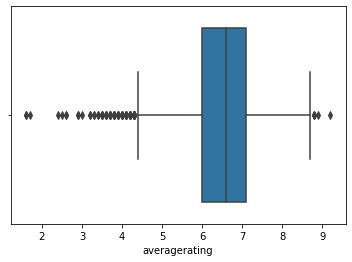

In [82]:
# use a box plot to identify outliers

sns.boxplot(data=df, x="averagerating")

The averagerating_outliers are possible values thus we will leave them as they are. This is further backed by the box plot above.

##### 6. numvotes

In [84]:
numvotes_outliers = IQR_outliers(df, "numvotes")
numvotes_outliers[0]

[275300,
 539338,
 366366,
 241792,
 195889,
 235256,
 283534,
 682218,
 228701,
 339338,
 487527,
 535836,
 302302,
 668137,
 424542,
 254975,
 501213,
 647288,
 402462,
 284547,
 683264,
 225557,
 1299334,
 553751,
 204571,
 322524,
 611299,
 719629,
 277204,
 452036,
 648854,
 525632,
 239480,
 316539,
 284869,
 329135,
 218371,
 202430,
 182320,
 1035358,
 207488,
 534683,
 223464,
 271307,
 621018,
 315584,
 592221,
 229818,
 246641,
 220567,
 207417,
 1005960,
 252281,
 565563,
 260383,
 196109,
 215761,
 268678,
 326657,
 208827,
 514510,
 211587,
 214055,
 235308,
 338728,
 492490,
 657690,
 428142,
 303523,
 477771,
 206714,
 497363,
 338445,
 608930,
 182025,
 500595,
 330125,
 181189,
 568578,
 403755,
 447624,
 692794,
 228465,
 300475,
 473020,
 307897,
 195560,
 464511,
 211733,
 234616,
 1387769,
 326473,
 1841066,
 210377,
 227616,
 221664,
 533039,
 795227,
 780910,
 526273,
 359123,
 273106,
 366409,
 235167,
 284034,
 445535,
 197663,
 432800,
 199764,
 401286,
 8208

The numvotes_outliers are possible values thus we will leave them as they are. This is further backed by the box plot above.

##### 7. year

In [86]:
year_outliers = IQR_outliers(df, "year")
year_outliers[0]

[]

<AxesSubplot:xlabel='year'>

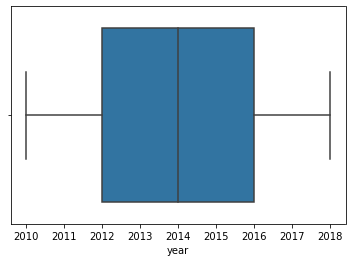

In [87]:
# use a box plot to identify outliers

sns.boxplot(data=df, x="year")

The start year has no outliers as shown above

### Final Data

In [88]:
#preview first 5 rows
df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,studio,domestic_gross,foreign_gross,year
0,tt0315642,Wazir,Wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,Relbig.,1100000.0,NaN,2016
1,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,IFC,744000.0,8000000,2012
4,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,Fox,58200000.0,129900000,2013
5,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,Uni.,26300000.0,26900000,2014
6,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Uni.,652300000.0,"1,019.4",2015


In [89]:
df.dtypes

movie_id            object
primary_title       object
original_title      object
start_year           int64
runtime_minutes    float64
genres              object
averagerating      float64
numvotes             int64
studio              object
domestic_gross     float64
foreign_gross       object
year                 int64
dtype: object

# Exploratory Analysis and visualization

In [90]:
df.columns

Index(['movie_id', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes', 'studio',
       'domestic_gross', 'foreign_gross', 'year'],
      dtype='object')

In [91]:
#check unique titles
primary_titles = df.primary_title.unique()
len(primary_titles)

2594

In [92]:
#check unique studios
studios = df.studio.unique()
len(studios)

216

In [93]:
#check unique genres
genres = df.genres.unique()
len(genres)

302

In [94]:
#no.of movies per studio
studios_titles= df.studio.value_counts()
studios_titles

IFC         128
Uni.        127
Fox         117
WB          104
Magn.       100
           ... 
Orion         1
Zee           1
TA            1
Blue Fox      1
Arrow         1
Name: studio, Length: 216, dtype: int64

In [95]:
most_popular_studios = studios_titles[studios_titles >= 50]
most_popular_studios

IFC      128
Uni.     127
Fox      117
WB       104
Magn.    100
SPC       94
BV        86
Sony      82
Par.      80
LGF       80
Eros      71
Wein.     64
FoxS      62
RAtt.     53
Focus     50
Name: studio, dtype: int64

In [96]:
#top 20 movies based on domestic_gross income
income_df = df[["domestic_gross", "primary_title", "genres", "runtime_minutes"]]
studio_by_highest_income_df = income_df.sort_values('domestic_gross', ascending = False)
studio_by_highest_income_df.head(20)

,domestic_gross,primary_title,genres,runtime_minutes
1301,700100000.0,Black Panther,"Action,Adventure,Sci-Fi",134.0
2542,678800000.0,Avengers: Infinity War,"Action,Adventure,Sci-Fi",149.0
6,652300000.0,Jurassic World,"Action,Adventure,Sci-Fi",124.0
1984,620200000.0,Star Wars: The Last Jedi,"Action,Adventure,Fantasy",152.0
2373,608600000.0,Incredibles 2,"Action,Adventure,Animation",118.0
2432,532200000.0,Rogue One: A Star Wars Story,"Action,Adventure,Sci-Fi",133.0
1778,486300000.0,Finding Dory,"Adventure,Animation,Comedy",97.0
1907,459000000.0,Avengers: Age of Ultron,"Action,Adventure,Sci-Fi",141.0
483,448100000.0,The Dark Knight Rises,"Action,Thriller",164.0
1463,424700000.0,The Hunger Games: Catching Fire,"Action,Adventure,Sci-Fi",146.0


In [97]:
#top 20 movies based on rating
rating_df = df[["averagerating", "numvotes", "primary_title", "genres"]]
rating_df = rating_df.sort_values('averagerating', ascending = False)
rating_df.head(20)

,averagerating,numvotes,primary_title,genres
658,9.2,8,The Wall,Documentary
1186,8.9,49,The Mayor,"Comedy,Documentary,Drama"
3026,8.8,2067,Burn the Stage: The Movie,"Documentary,Music"
834,8.8,31,Skin Trade,Documentary
514,8.8,1841066,Inception,"Action,Adventure,Sci-Fi"
1096,8.7,17,Eyes Wide Open,"Documentary,History"
2077,8.7,6,Oro,Documentary
101,8.6,1299334,Interstellar,"Adventure,Drama,Sci-Fi"
594,8.6,55318,Senna,"Biography,Documentary,Sport"
1732,8.6,46,Kin,"Drama,Music"


## Ask and Answer Question

Is domestic gross capital or foreign gross higher
does year affect gross and foreign gross
studio vs gross income
What are the top studios by no. of titles?
WHat are the top studios by gross income? Domestic and foreign?
most studios have very few titles